## Task for Haensel AMS
### Description

The target variable is Price. You have 7 attributes and obviously we want you to build some initial ML model which predicts the prices.

1. Make some initial data analysis, which will hint to some stuctures in the data and how attributes are connected.
2. Fit some ML model(s) and explain briefly your choices.
3. Show with some X-validation the power of your model and comment the results.
4. Present us the results and the steps you have taken and also with some critical thinking and next steps.
    - well commented and easy to follow code
    - PDF (max 3 pages) with brief steps taken and results (incl. intermediates)

Please use Python for your solution.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("sample.csv")

In [3]:
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [4]:
df.dtypes

loc1      object
loc2      object
para1      int64
dow       object
para2      int64
para3    float64
para4    float64
price    float64
dtype: object

# Target variable

In [5]:
df.corr()

,para1,para2,para3,para4,price
para1,1.000000,0.072025,0.010420,0.001663,0.074754
para2,0.072025,1.000000,0.006978,0.020806,0.552681
para3,0.010420,0.006978,1.000000,0.691237,0.355088
para4,0.001663,0.020806,0.691237,1.000000,0.514990
price,0.074754,0.552681,0.355088,0.514990,1.000000


<AxesSubplot:xlabel='price'>

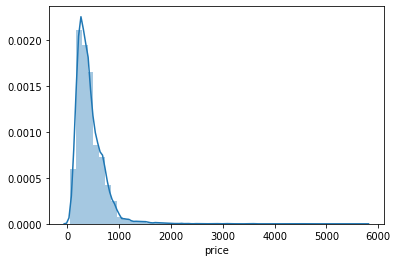

In [6]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price'>

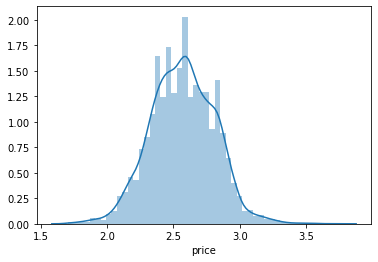

In [7]:
sns.distplot(np.log10(df.price))

# String variables

In [8]:
df['loc1'].unique()

array(['0', '9', '4', '5', '7', '8', '1', '3', '2', '6', 'S', 'T'],
      dtype=object)

In [9]:
df.loc1.value_counts()

2    1607
0    1486
1    1223
7    1081
3     945
5     846
4     773
8     727
9     690
6     620
S       1
T       1
Name: loc1, dtype: int64

/home/data/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/data/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


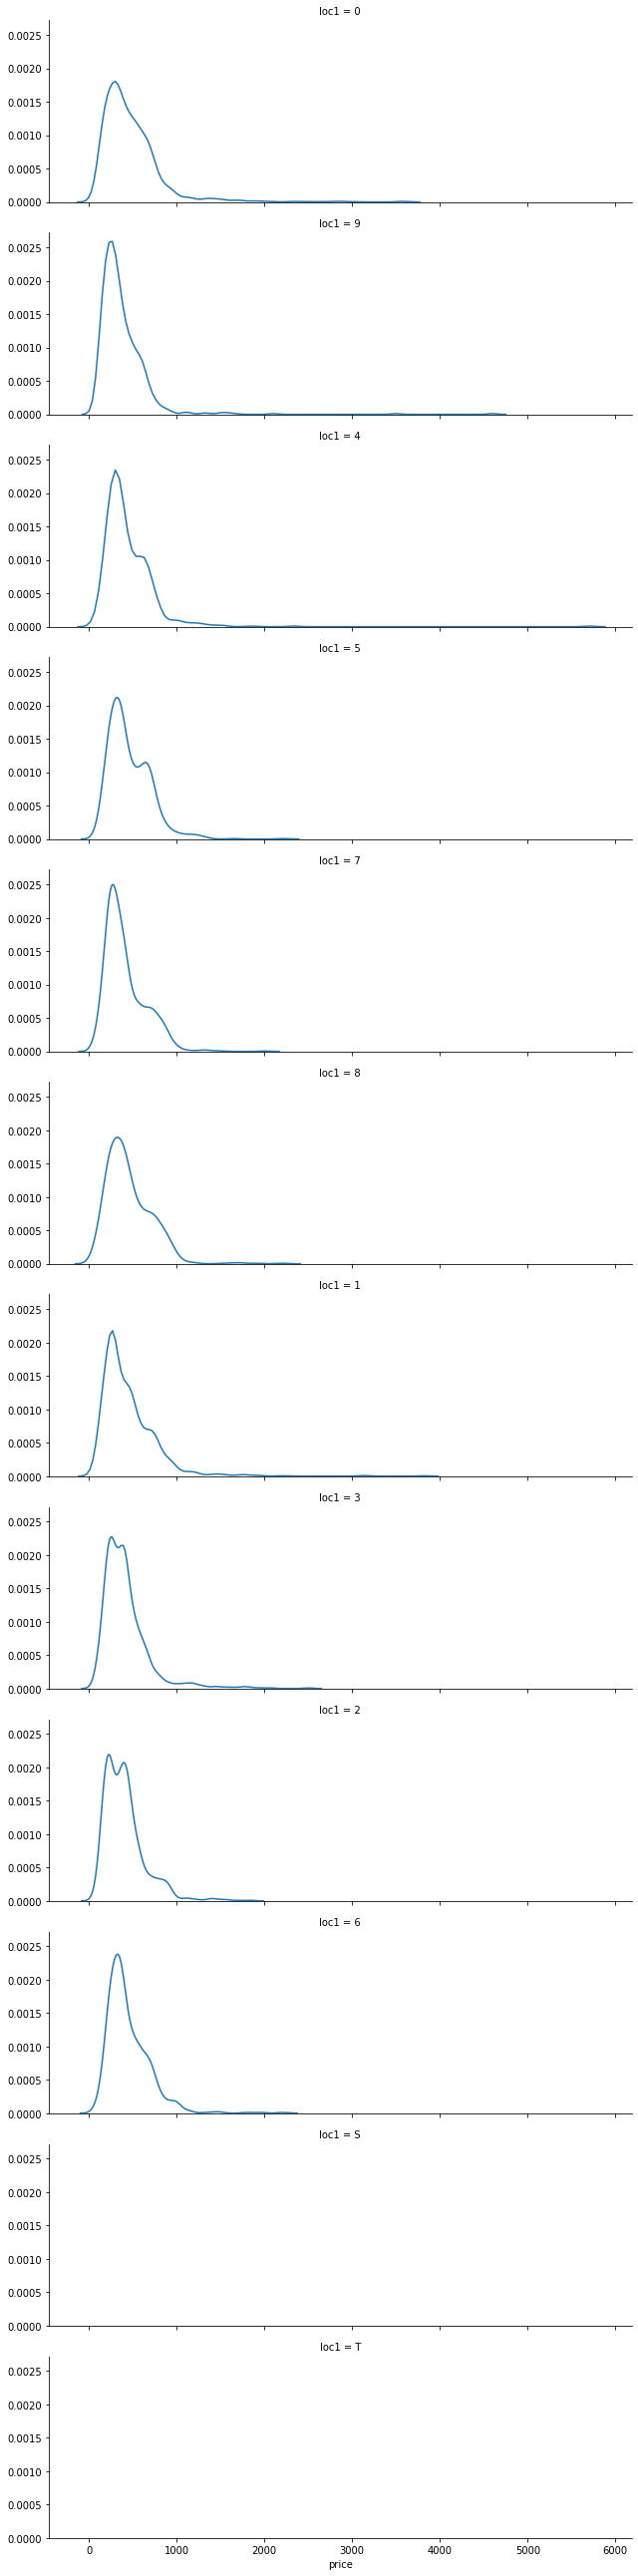

In [10]:
g = sns.FacetGrid(df, row="loc1", aspect=3,)
g.map(sns.kdeplot, "price")

In [11]:
df['loc1_num'] = pd.to_numeric(df['loc1'], errors='coerce')

In [12]:
df.corr()

,para1,para2,para3,para4,price,loc1_num
para1,1.000000,0.072025,0.010420,0.001663,0.074754,0.011312
para2,0.072025,1.000000,0.006978,0.020806,0.552681,0.060019
para3,0.010420,0.006978,1.000000,0.691237,0.355088,-0.123741
para4,0.001663,0.020806,0.691237,1.000000,0.514990,-0.124757
price,0.074754,0.552681,0.355088,0.514990,1.000000,-0.045699
loc1_num,0.011312,0.060019,-0.123741,-0.124757,-0.045699,1.000000


In [13]:
df['loc2'].unique()

array(['01', '99', '04', '40', '50', '03', '09', '74', '89', '17', '34',
       '30', '21', '59', '28', '64', '14', '46', '19', '15', '90', '67',
       '85', '24', '12', '20', '23', '08', '06', '95', '37', '77', '73',
       '88', '66', '39', '41', '68', '47', '33', '35', '78', '54', '76',
       '51', '79', '16', '02', '29', '57', '45', '80', '31', '70', '22',
       '27', '87', '53', '75', '38', '26', '25', '63', '86', '97', '81',
       '13', '49', '32', '72', '71', '10', '94', '96', '93', '42', '48',
       '55', '91', '58', '60', '44', '52', '05', '36', '82', '56', '84',
       '65', '07', '92', '83', '18', '69', '98', '62', '00', '61', '0B',
       'S6', '43', '0T', 'TS', '0L', '11', '0C', '0N'], dtype=object)

In [14]:
df['loc2_num'] = pd.to_numeric(df['loc2'], errors='coerce')

In [15]:
df['dow'].unique()

array(['Mon', 'Thu', 'Tue', 'Wed', 'Fri', 'Sat', 'Sun'], dtype=object)

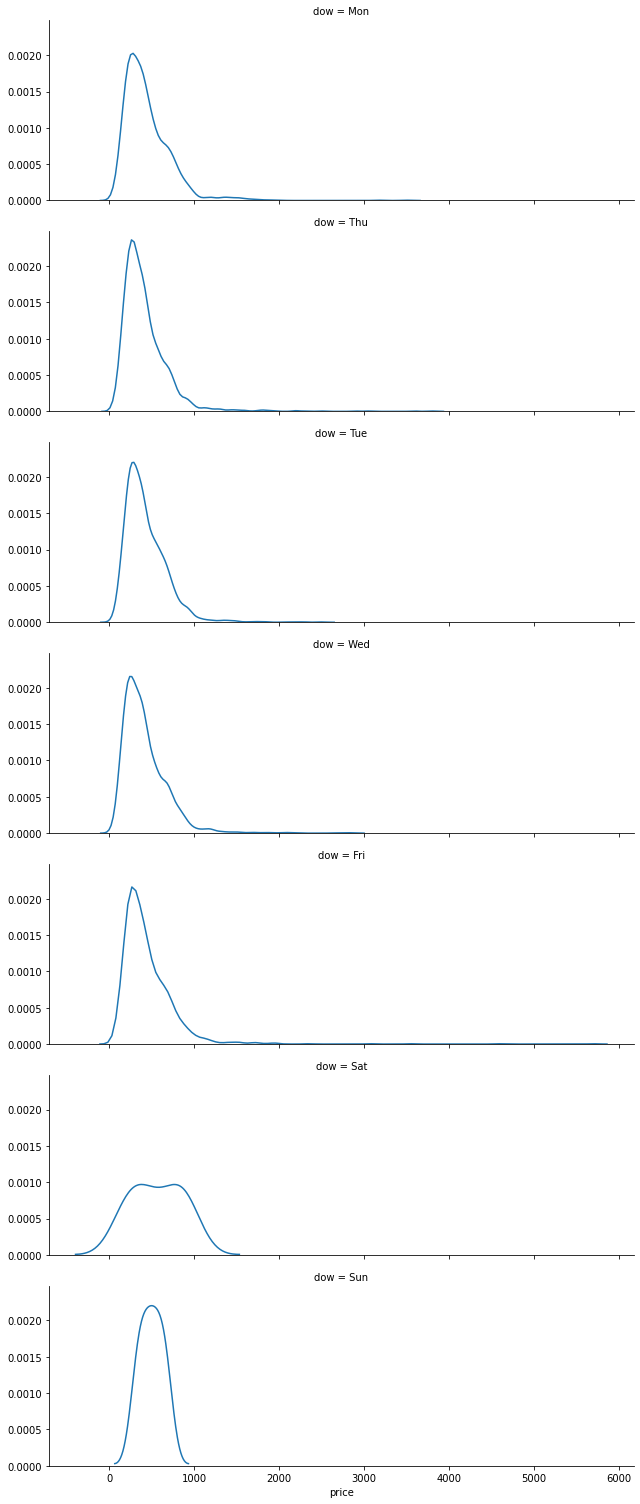

In [16]:
g = sns.FacetGrid(df, row="dow", aspect=3,)
g.map(sns.kdeplot, "price")

# Numeric variables

In [17]:
df['para1'].value_counts()

1      7052
3      1613
0       836
2       268
4       164
5        51
6         6
7         3
13        2
9         2
337       1
24        1
8         1
Name: para1, dtype: int64

/home/data/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/data/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/data/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


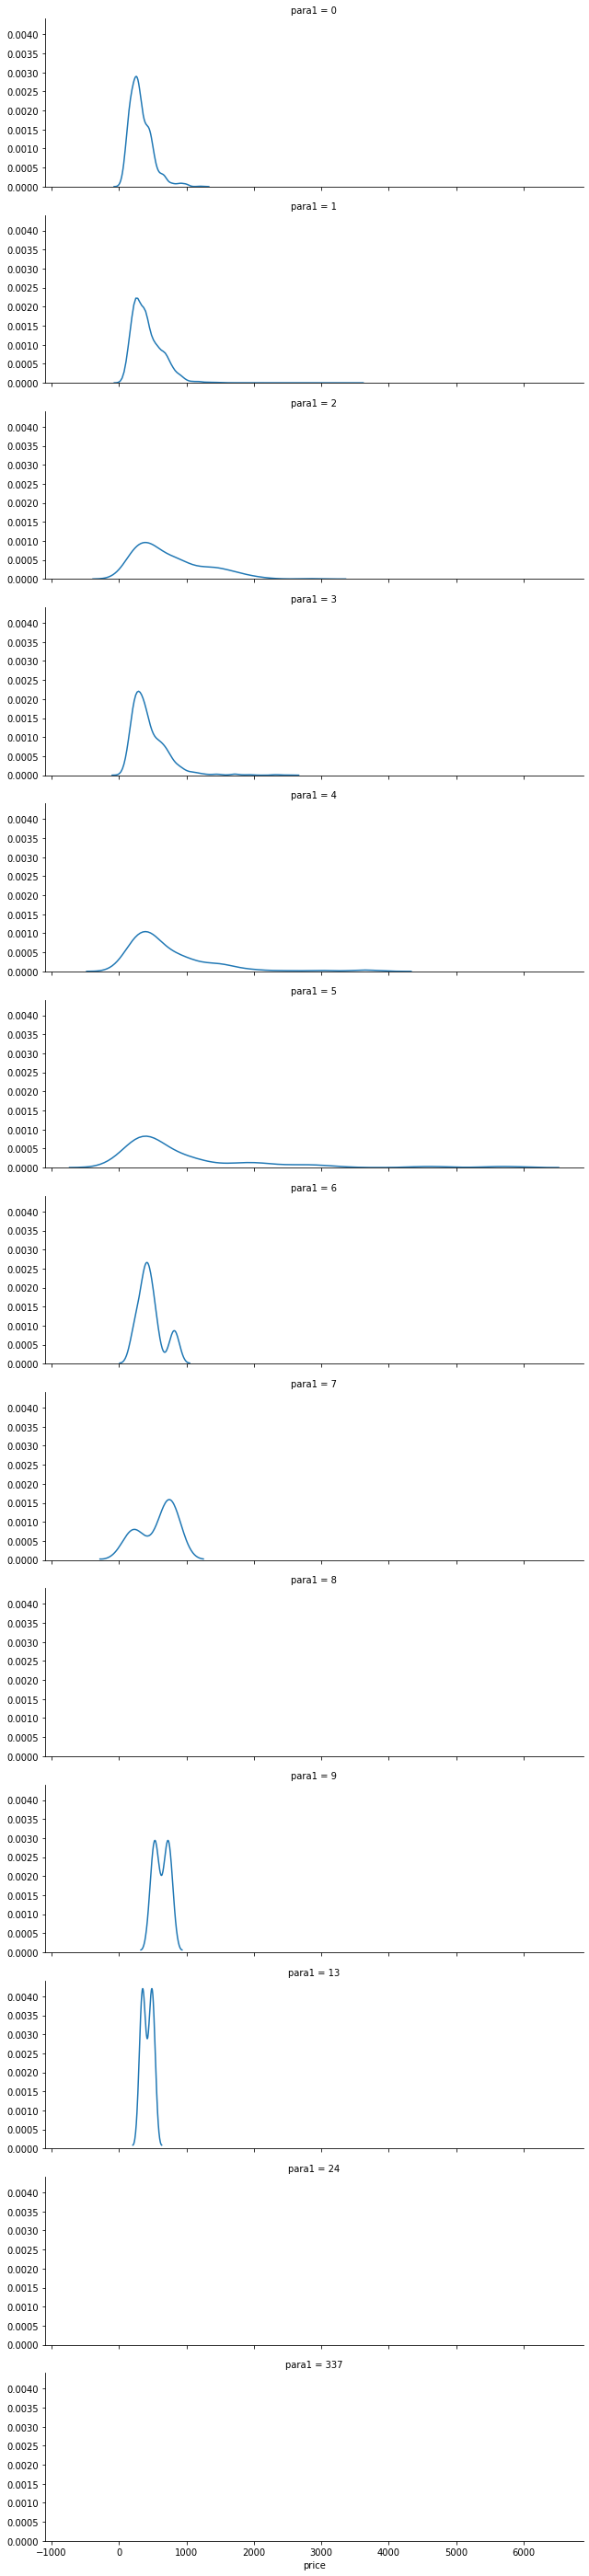

In [18]:
g = sns.FacetGrid(df, row="para1", aspect=3,)
g.map(sns.kdeplot, "price")

<AxesSubplot:xlabel='para2'>

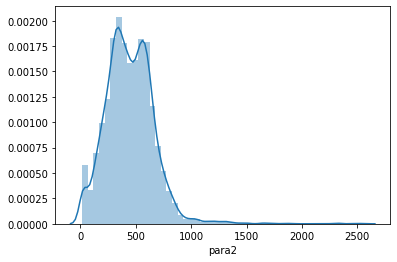

In [19]:
sns.distplot(df['para2'])

<AxesSubplot:xlabel='para3'>

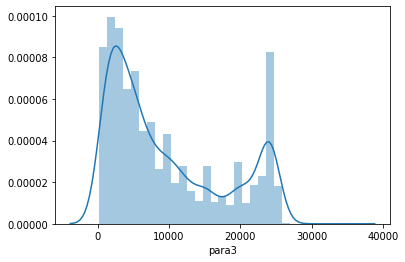

In [20]:
sns.distplot(df['para3'])

<AxesSubplot:xlabel='para4'>

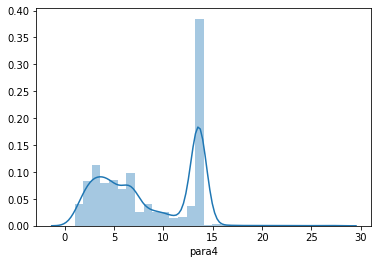

In [21]:
sns.distplot(df['para4'])

# Splits

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

In [23]:
target = 'price'
X = df.loc[:,~df.columns.isin([target])]
y = np.log10(df[target])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

#X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, random_state=1) # 0.25 x 0.8 = 0.2

In [25]:
print(X_train.shape)
print(X_test.shape)

(9000, 9)
(1000, 9)


# Feature Engineering

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
categorical_features = ['dow', 'para1', 'loc1', 'loc2']
numerical_features = ['para2', 'para3', 'para4']

In [28]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Model training

In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

def acper(y_true, y_pred, threshold=.05):
    y_true = np.exp(y_true)
    y_pred = np.exp(y_pred)
    results = []
    for current_true, current_pred in zip(y_true, y_pred):
        delta = current_true*threshold
        results.append((current_true-delta) <= current_pred <= (current_true+delta))
    return sum(results) / len(results)

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmse(y_true, y_pred):
    return rmsle(10**y_true, 10**y_pred)

In [33]:
classifiers = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

for classifier in classifiers:
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    scoring = {
        'r2': 'r2',
        'acper': make_scorer(acper),
        'rmse': make_scorer(rmse),
        'rmsle': make_scorer(rmsle)
    }
    scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=5)
    print(f"{str(classifier):<60}: R2={np.mean(scores['test_r2']):>6.3f} ACPER={np.mean(scores['test_acper']):.3f} RMSLE={np.mean(scores['test_rmsle']):.3f}, RMSE={np.mean(scores['test_rmse']):.3f}")

LinearRegression()                                          : R2= 0.623 ACPER=0.348 RMSLE=0.148, RMSE=175.508
Ridge()                                                     : R2= 0.624 ACPER=0.348 RMSLE=0.147, RMSE=173.916
Lasso()                                                     : R2=-0.001 ACPER=0.162 RMSLE=0.241, RMSE=282.911
AdaBoostRegressor()                                         : R2= 0.546 ACPER=0.248 RMSLE=0.162, RMSE=187.583
GradientBoostingRegressor()                                 : R2= 0.667 ACPER=0.399 RMSLE=0.139, RMSE=157.856


# Results

In [34]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingRegressor())])

In [35]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['para2', 'para3', 'para4']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['dow'

In [36]:
pred_test = clf.predict(X_test)

In [37]:
rmse(y_test, pred_test)

178.3497517289422

In [38]:
rmsle(y_test, pred_test)

0.1428169326642498